In [1]:
%pylab inline
import numpy as np
import pylab as pl

Populating the interactive namespace from numpy and matplotlib


In [2]:
from sklearn import svm

In [3]:
svc = svm.SVC(kernel='linear')

from sklearn import datasets

iris = datasets.load_iris()

X = iris.data[:, :2]

y = iris.target

svc.fit(X, y)

SVC(kernel='linear')

In [6]:
from matplotlib.colors import ListedColormap

cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])

cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

def plot_estimator(estimator, X, y):
    
    estimator.fit(X, y)
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
    Z = estimator.predict(np.c_[xx.ravel(), yy.ravel()])
    
    Z = Z.reshape(xx.shape)
    
    pl.figure()
    
    pl.pcolormesh(xx, yy, Z, cmap=cmap_light)
    
    pl.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold)
    
    pl.axis('tight')
    pl.axis('off')
    pl.tight_layout()

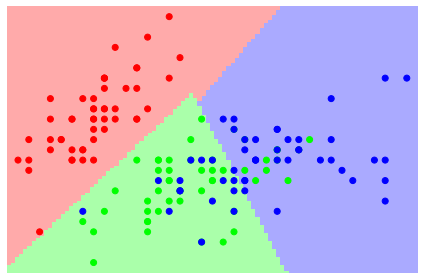

In [7]:
plot_estimator(svc, X, y)

/Users/huip/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


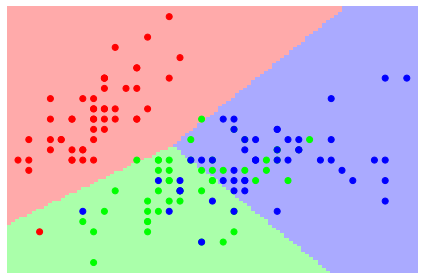

In [9]:
plot_estimator(svm.LinearSVC(), X, y)

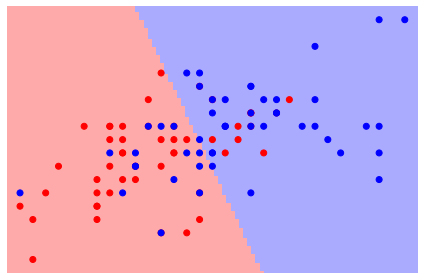

In [10]:
X, y = X[np.in1d(y, [1,2])], y[np.in1d(y, [1,2])]
plot_estimator(svc, X, y)
pl.scatter(svc.support_vectors_[:, 0], svc.support_vectors_[:, 1], s=80, facecolors='none', zorder=10)

Text(0.5, 1.0, 'High C values: small number of support vectors')

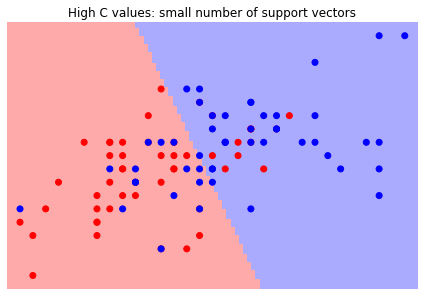

In [11]:
svc = svm.SVC(kernel='linear', C=1e3)
plot_estimator(svc, X, y)
pl.scatter(svc.support_vectors_[:, 0], svc.support_vectors_[:, 1], s=80, facecolors='none', zorder=10)
pl.title('High C values: small number of support vectors')

Text(0.5, 1.0, 'Low C values: high number of support vectors')

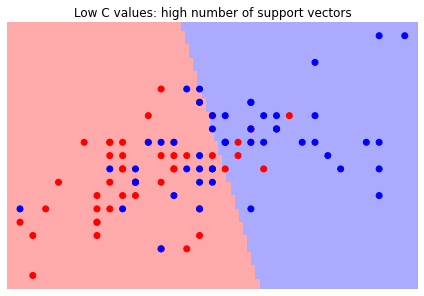

In [13]:
svc = svm.SVC(kernel='linear', C=1e-3)
plot_estimator(svc, X, y)
pl.scatter(svc.support_vectors_[:, 0], svc.support_vectors_[:,1], facecolors='none', zorder=10)
pl.title('Low C values: high number of support vectors')

Text(0.5, 1.0, 'Linear kernel')

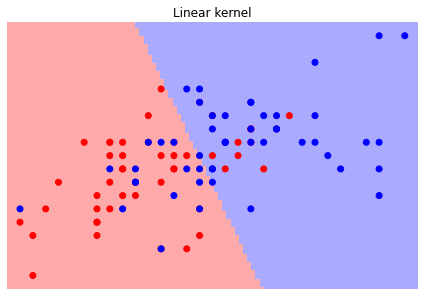

In [14]:
svc = svm.SVC(kernel='linear')
plot_estimator(svc, X, y)
pl.scatter(svc.support_vectors_[:, 0], svc.support_vectors_[:, 1], s=80, facecolors='none', zorder=10)
pl.title('Linear kernel')

Text(0.5, 1.0, 'Polynomial kernel')

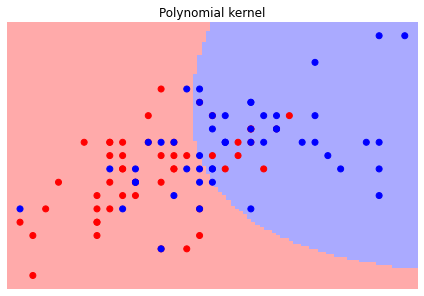

In [17]:
svc = svm.SVC(kernel='poly', degree=4)
plot_estimator(svc, X, y)
pl.scatter(svc.support_vectors_[:, 0], svc.support_vectors_[:,1], s=80, facecolors='none', zorder=10)
pl.title('Polynomial kernel')

Text(0.5, 1.0, 'RBF kernel')

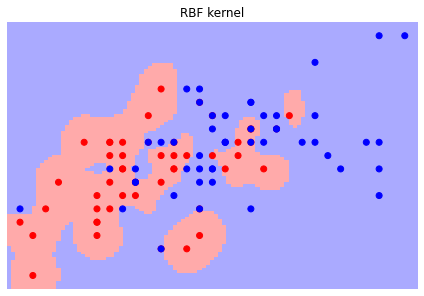

In [19]:
svc = svm.SVC(kernel='rbf', gamma=1e2)
plot_estimator(svc, X, y)
pl.scatter(svc.support_vectors_[:, 0], svc.support_vectors_[:,1], s=80, facecolors='none', zorder=10)
pl.title('RBF kernel')